In [1]:
from fastai.vision import *

In [3]:
import pandas as pd

In [2]:
TRAIN_PATH = Path("/home/shaun/personal/kaggle-data/nybg2020/train/")

In [32]:
MODEL_PATH = Path("/home/shaun/personal/kaggle-data/nybg2020/models/")

In [4]:
df = pd.read_csv(TRAIN_PATH/"train.csv")

In [5]:
df.head()

,Unnamed: 0,category_id,image_id,region_id,file_name,height,license,width,family,genus,name,family_id,genus_id
0,0,15672,354106,1,images/156/72/354106.jpg,1000,1,661,Lecythidaceae,Lecythis,Lecythis retusa Spruce ex O.Berg,246,1040
1,1,15672,545181,1,images/156/72/545181.jpg,1000,1,661,Lecythidaceae,Lecythis,Lecythis retusa Spruce ex O.Berg,246,1040
2,2,15672,449419,1,images/156/72/449419.jpg,1000,1,662,Lecythidaceae,Lecythis,Lecythis retusa Spruce ex O.Berg,246,1040
3,3,15672,200223,1,images/156/72/200223.jpg,1000,1,661,Lecythidaceae,Lecythis,Lecythis retusa Spruce ex O.Berg,246,1040
4,4,15672,5327,1,images/156/72/5327.jpg,1000,1,661,Lecythidaceae,Lecythis,Lecythis retusa Spruce ex O.Berg,246,1040


In [37]:
df_train = df[[ "file_name", "category_id"]]
df_train =  df_train.rename(columns={"category_id": "label", "file_name":"name"})


In [38]:
df_train.head()

,name,label
0,images/156/72/354106.jpg,15672
1,images/156/72/545181.jpg,15672
2,images/156/72/449419.jpg,15672
3,images/156/72/200223.jpg,15672
4,images/156/72/5327.jpg,15672


In [39]:
sample = df_train.groupby('label').apply(lambda x: x.sample(n=20, replace=True)).reset_index(drop = True)

In [40]:
sample.head()

,name,label
0,images/000/00/626762.jpg,0
1,images/000/00/897248.jpg,0
2,images/000/00/818271.jpg,0
3,images/000/00/495523.jpg,0
4,images/000/00/626762.jpg,0


In [41]:
len(sample)

641860

In [42]:
data = (ImageList.from_df(df_train,TRAIN_PATH)
        .split_by_rand_pct()
        .label_from_df()
        .transform(size=128)
        .databunch(bs=128))

/home/shaun/personal/.pytorch-env/lib/python3.6/site-packages/fastai/data_block.py:534: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
3112, 6232, 22189, 23593, 5480...
  if getattr(ds, 'warn', False): warn(ds.warn)


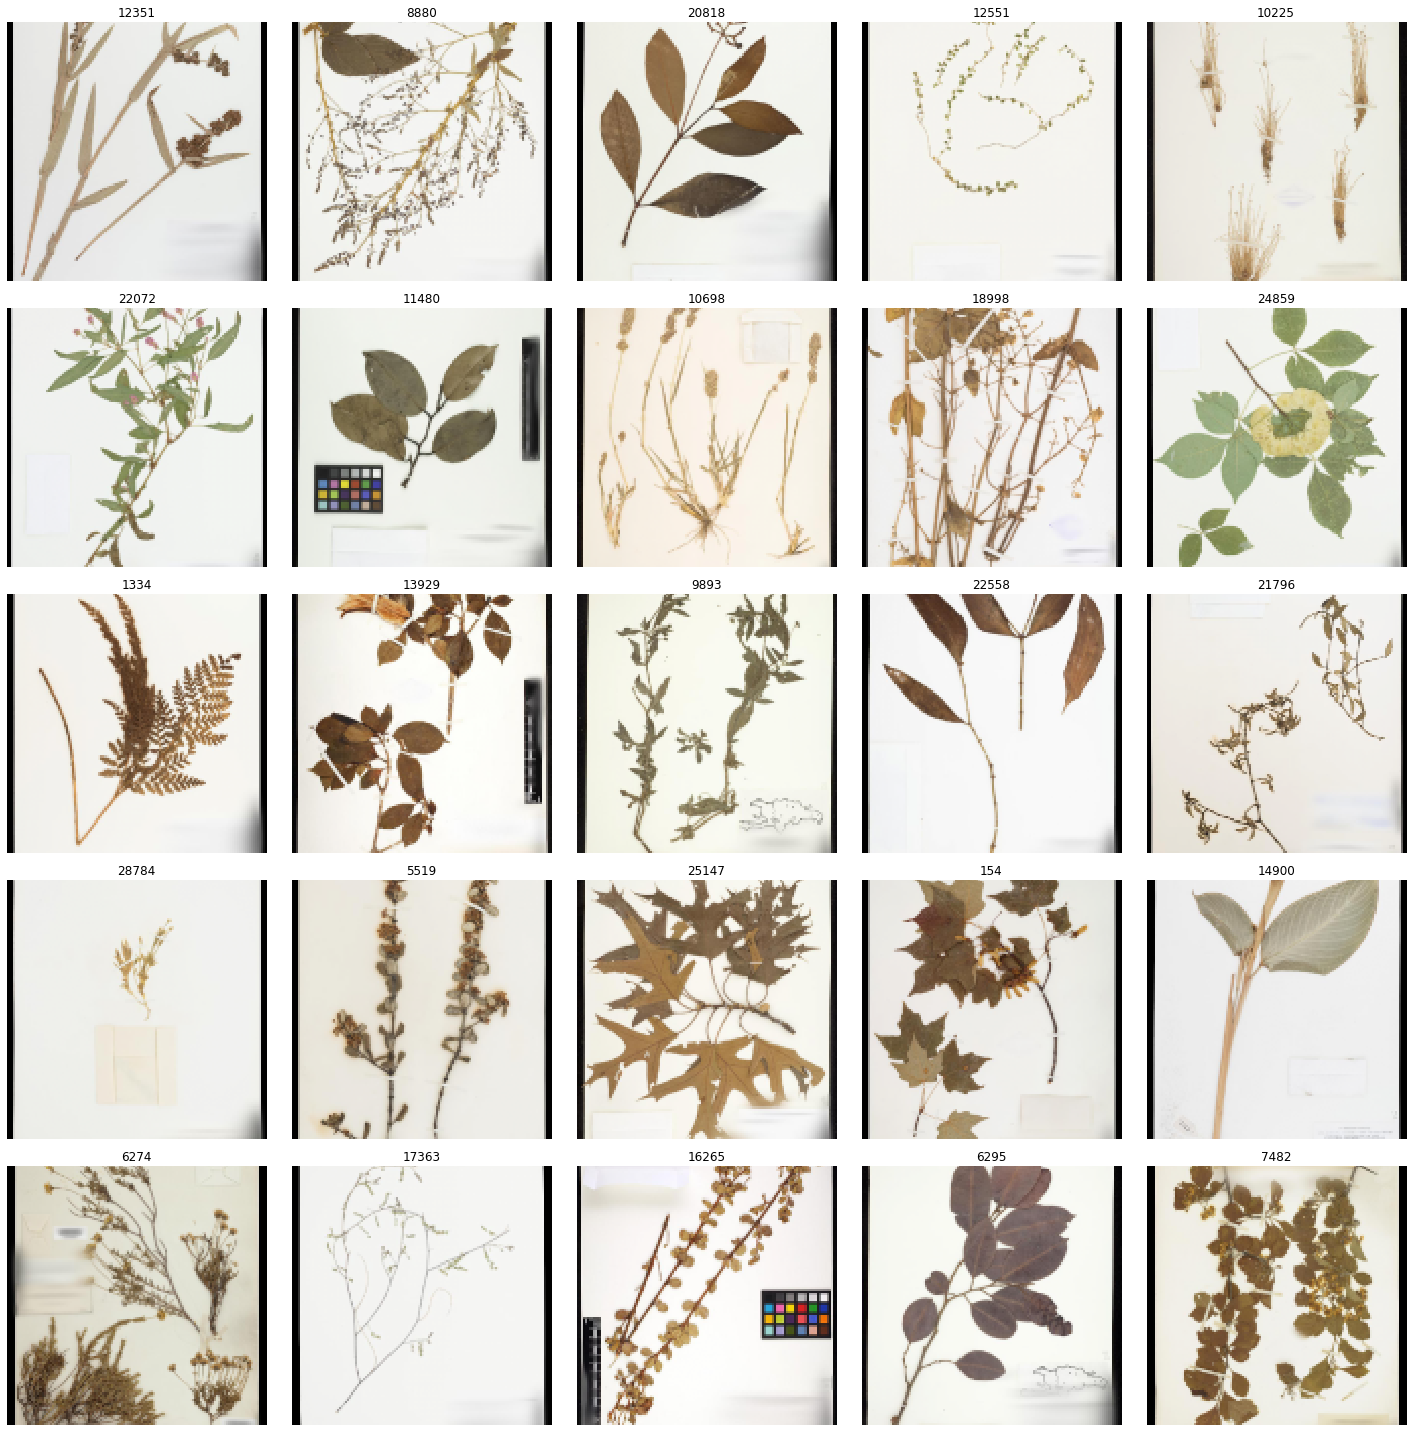

In [43]:
data.show_batch()

In [44]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [45]:
learn.unfreeze()

In [46]:
learn.fit_one_cycle(3, max_lr=(1e-4, 1e-3, 1e-2), wd=(1e-4,1e-4,1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,6.721348,6.331872,0.168288,1:08:43
1,5.734519,4.950062,0.324112,1:10:00
2,4.954755,4.332292,0.452582,1:09:44


In [47]:
learn.save(MODEL_PATH/"model-2")

In [36]:
! ls $MODEL_PATH

model-1.pth
